#### **Reading Data**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import re

In [88]:
df = pd.read_csv("Food_Inspections-Copy1.csv")
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2561123,LOWCOUNTRY,LOWCOUNTRY,1042664.0,Restaurant,Risk 1 (High),3343 N CLARK ST,CHICAGO,IL,60657.0,07/21/2022,Complaint,No Entry,NaN,41.942869,-87.652863,"(41.942869318828365, -87.65286280377227)"
1,2560419,CHARTWELLS,MANSUETO HIGH SCHOOL,2549059.0,HIGH SCHOOL KITCHEN,Risk 1 (High),2911 W W 47TH ST,CHICAGO,IL,60632.0,07/07/2022,Canvass,Out of Business,NaN,NaN,NaN,NaN
2,2557095,WOW BAO,WOW BAO,1379974.0,Restaurant,Risk 1 (High),835 N MICHIGAN AVE,CHICAGO,IL,60611.0,06/09/2022,Canvass Re-Inspection,Pass,NaN,41.897741,-87.623961,"(41.897740856252504, -87.62396131598219)"
3,2557044,PAN ARTESANAL,PAN ARTESANAL,2602146.0,Bakery,Risk 1 (High),3724 W FULLERTON AVE,CHICAGO,IL,60647.0,06/09/2022,Canvass,Pass,NaN,41.924670,-87.720445,"(41.92467025197142, -87.72044496440567)"
4,2556917,BISTRO,BISTRO,2846045.0,Restaurant,Risk 1 (High),1400 S JEAN BAPTISTE POINTE DUSABLE LAKESHORE DR,CHICAGO,IL,60605.0,06/07/2022,Canvass,Pass,NaN,NaN,NaN,NaN


In [89]:
df.shape

(247140, 17)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247140 entries, 0 to 247139
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    247140 non-null  int64  
 1   DBA Name         247140 non-null  object 
 2   AKA Name         244655 non-null  object 
 3   License #        247132 non-null  float64
 4   Facility Type    242113 non-null  object 
 5   Risk             247064 non-null  object 
 6   Address          247140 non-null  object 
 7   City             246968 non-null  object 
 8   State            247093 non-null  object 
 9   Zip              247062 non-null  float64
 10  Inspection Date  247140 non-null  object 
 11  Inspection Type  247139 non-null  object 
 12  Results          247140 non-null  object 
 13  Violations       179983 non-null  object 
 14  Latitude         246287 non-null  float64
 15  Longitude        246287 non-null  float64
 16  Location         246287 non-null  obje

#### **Removing Null values from violations column**

In [91]:
df = df[~df["Violations"].isnull()]

df.shape

(179983, 17)

In [92]:
for i in df.columns:
    print(i,df[i].nunique())

Inspection ID 179983
DBA Name 25078
AKA Name 23756
License # 31390
Facility Type 445
Risk 3
Address 17237
City 47
State 5
Zip 94
Inspection Date 3241
Inspection Type 60
Results 6
Violations 178840
Latitude 16329
Longitude 16329
Location 16329


#### **Removing columns which are not needed**

In [93]:
df.drop(["Inspection ID","DBA Name","AKA Name","License #","Address","Inspection Date","Latitude","Longitude","Location"],axis=1,inplace=True)

In [94]:
df.reset_index(inplace=True)
df.head()

,index,Facility Type,Risk,City,State,Zip,Inspection Type,Results,Violations
0,24,Grocery Store,Risk 2 (Medium),CHICAGO,IL,60659.0,Complaint Re-Inspection,Fail,"6. PROPER EATING, TASTING, DRINKING, OR TOBACC..."
1,33,Restaurant,Risk 1 (High),CHICAGO,IL,60618.0,Canvass,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E..."
2,51,Restaurant,Risk 1 (High),CHICAGO,IL,60644.0,Complaint,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E..."
3,54,Restaurant,Risk 1 (High),CHICAGO,IL,60609.0,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW..."
4,65,Restaurant,Risk 1 (High),CHICAGO,IL,60609.0,Canvass,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW..."


In [95]:
df["State"].unique()

array(['IL', 'IN', nan, 'CA', 'NY', 'WI'], dtype=object)

In [96]:
df.drop(["index","Facility Type","City","State","Zip","Inspection Type"],axis=1,inplace=True)

In [97]:
df.head()

,Risk,Results,Violations
0,Risk 2 (Medium),Fail,"6. PROPER EATING, TASTING, DRINKING, OR TOBACC..."
1,Risk 1 (High),Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E..."
2,Risk 1 (High),Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E..."
3,Risk 1 (High),Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW..."
4,Risk 1 (High),Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW..."


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179983 entries, 0 to 179982
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Risk        179981 non-null  object
 1   Results     179983 non-null  object
 2   Violations  179983 non-null  object
dtypes: object(3)
memory usage: 4.1+ MB


In [99]:
df.dropna(inplace=True)

In [100]:
df["Results"].value_counts()

Pass                  97287
Fail                  44604
Pass w/ Conditions    37369
No Entry                610
Not Ready                71
Out of Business          40
Name: Results, dtype: int64

In [101]:
df["Violations"][0]

"6. PROPER EATING, TASTING, DRINKING, OR TOBACCO USE - Comments: 2-401.11  OBSERVED COFFEE CUPS, PIZZA BOXES AND DOUGHNUTS STORED IN THE MEAT PREP AREA ON THE CUTTING BOARDS AND COUNTERTOPS.  MANAGEMENT INSTRUCTED THAT EMPLOYEES MUST EAT AND DRINK IN DESIGNATED AREAS ONLY. | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: 6-301.14  OBSERVED NO HAND WASHING SIGN LOCATED IN THE WASHROOM ADJACENT TO THE MEAT PREP AREA.  MANAGEMENT INSTRUCTED TO INSTALL AND MAINTAIN. | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: 5-204.11  OBSERVED NO EXPOSED HAND WASHING SINK LOCATED AT THE FRONT CASH REGISTER STATION WHERE FETA CHEESE IS SERVED OUT OF THE DELI CASE TO CUSTOMERS. MANAGEMENT INSTRUCTED TO INSTALL AN EXPOSED HAND WASHING SINK IN THIS AREA OR RELOCATE THE COOLER WHERE A HAND WASHING SINK IS CLOSE AND ACCESSIBLE. PRIORITY FOUNDATION 7-38-030(C). NO CITATION ISSUED. | 29. COMPLIANCE WITH VARIANCE/SPECIALIZED PROCESS/HACCP - Comments: 3

In [102]:
df["Risk"].unique()

array(['Risk 2 (Medium)', 'Risk 1 (High)', 'Risk 3 (Low)'], dtype=object)

In [103]:
df["Risk"] = df["Risk"].map({'Risk 2 (Medium)':1,'Risk 1 (High)':2,'Risk 3 (Low)':0})

### **Making it a binary classification problem by making the results as 0 or 1**

In [104]:
def group_result(result):
    if result == 'Pass':
        return 1
    elif result == 'Pass w/ Conditions':
        return 1
    else:
        return 0

df["results_final"] = df["Results"].apply(lambda x: group_result(x))

In [105]:
df.head()

,Risk,Results,Violations,results_final
0,1,Fail,"6. PROPER EATING, TASTING, DRINKING, OR TOBACC...",0
1,2,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",0
2,2,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",0
3,2,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",0
4,2,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",0


### **Extracting comments from the violations column**

In [106]:
df["comments"] = df["Violations"].apply(lambda x : re.sub(r'[0-9#\-]+\.[0-9]+\s+','',x))
df["comments"] = df["comments"].apply(lambda x : re.findall(r'(?<=Comments: )[^|]*(?=\||$)',x))
df['comments'] = df['comments'].apply(lambda x: ' '.join(str(i) for i in x))


In [107]:
df.head()

,Risk,Results,Violations,results_final,comments
0,1,Fail,"6. PROPER EATING, TASTING, DRINKING, OR TOBACC...",0,"OBSERVED COFFEE CUPS, PIZZA BOXES AND DOUGHNUT..."
1,2,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",0,OBSERVED NO VERIFIABLE HEALTH POLICY ON SITE A...
2,2,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",0,OBSERVED NO WRITTEN EMPLOYEE HEALTH POLICY ON ...
3,2,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",0,PIC DOESN'T HAVE A CERTIFIED FOOD MANAGERS CER...
4,2,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",0,PIC DOESN'T HAVE A FOOD MANAGERS CERTIFICATE.M...


In [108]:
df.shape

(179981, 5)

### **Seperating data into training and test data**

In [109]:
X = df.comments
y = df.results_final
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=45623)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(125986,)
(53995,)
(125986,)
(53995,)


### **Applying text preprocessing techniques**

In [110]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#### **Count Vectorizer**

In [111]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,3))
%time X_train_cv = cv.fit_transform(X_train)

CPU times: user 43.9 s, sys: 1.89 s, total: 45.8 s
Wall time: 46.1 s


#### **Tfidf Vectorizer**

In [112]:
tfidf = TfidfVectorizer(stop_words="english",ngram_range=(1,3))
%time X_train_tfidf = tfidf.fit_transform(X_train)

CPU times: user 45.5 s, sys: 2.45 s, total: 48 s
Wall time: 48.3 s


In [113]:
X_test_cv = cv.transform(X_test)
X_test_tfidf = tfidf.transform(X_test)

### **Building and comparing the classification model**

### **1. Logistic Regression**

#### **1.1 Logistic Regression with Count Vectorizer**

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [115]:
logreg_cv = LogisticRegression()
%time logreg_cv.fit(X_train_cv, y_train)

CPU times: user 5min 30s, sys: 1min 11s, total: 6min 41s
Wall time: 1min 8s


/Users/suyashlakhani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
y_pred_cv = logreg_cv.predict(X_test_cv)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     13559
           1       0.95      0.97      0.96     40436

    accuracy                           0.94     53995
   macro avg       0.93      0.91      0.92     53995
weighted avg       0.94      0.94      0.94     53995



In [118]:
from sklearn import metrics
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_cv) * 100:.1f}%")

Test Accuracy: 94.2%


In [119]:
print(metrics.confusion_matrix(y_test, y_pred_cv))

[[11539  2020]
 [ 1100 39336]]


In [120]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred_prob_cv = logreg_cv.predict_proba(X_test_cv)
roc_auc_score(y_test, y_pred_prob_cv[:,1])

0.9658240345438642

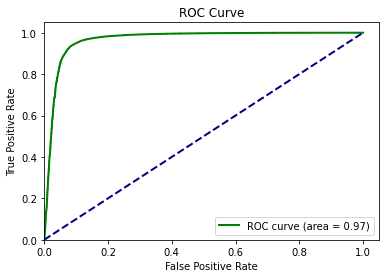

In [121]:
def roc_curve_plot(y_test_, y_pred_prob_):
    roc_score = roc_auc_score(y_test_, y_pred_prob_)
    fpr, tpr, thresholds = roc_curve(y_test_, y_pred_prob_)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='green',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
roc_curve_plot(y_test, y_pred_prob_cv[:,1])

#### **1.2 Logistic Regression with Tfidf Vectorizer**

In [122]:
logreg_tfidf = LogisticRegression()
%time logreg_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)

/Users/suyashlakhani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 4min 39s, sys: 1min 22s, total: 6min 2s
Wall time: 1min 11s


In [123]:
print(classification_report(y_test, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87     13559
           1       0.95      0.97      0.96     40436

    accuracy                           0.94     53995
   macro avg       0.93      0.91      0.91     53995
weighted avg       0.94      0.94      0.94     53995



In [150]:
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_tfidf) * 100:.1f}%")
print(f"Test Precision: {metrics.precision_score(y_test, y_pred_tfidf) * 100:.1f}%")
print(f"Test Recall: {metrics.recall_score(y_test, y_pred_tfidf) * 100:.1f}%")

Test Accuracy: 93.7%
Test Precision: 94.8%
Test Recall: 96.9%


In [125]:
print(metrics.confusion_matrix(y_test, y_pred_tfidf))

[[11425  2134]
 [ 1246 39190]]


In [126]:
y_pred_prob_tfidf = logreg_cv.predict_proba(X_test_tfidf)
roc_auc_score(y_test, y_pred_prob_tfidf[:,1])

0.9052806624402903

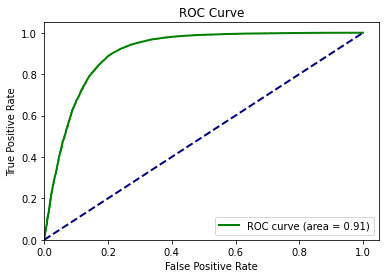

In [127]:
roc_curve_plot(y_test, y_pred_prob_tfidf[:,1])

### **2. Support Vector Machine**

#### **2.1 SVM with Count Vectorizer**

In [128]:
sv= svm.LinearSVC()
%time sv.fit(X_train_cv,y_train)
y_pred_cv_svm = sv.predict(X_test_cv)

CPU times: user 1min 22s, sys: 882 ms, total: 1min 23s
Wall time: 1min 23s


/Users/suyashlakhani/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [129]:
print(classification_report(y_test, y_pred_cv_svm))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     13559
           1       0.95      0.97      0.96     40436

    accuracy                           0.94     53995
   macro avg       0.92      0.91      0.91     53995
weighted avg       0.94      0.94      0.94     53995



In [130]:
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_cv_svm) * 100:.1f}%")

Test Accuracy: 93.7%


In [131]:
print(metrics.confusion_matrix(y_test, y_pred_cv_svm))

[[11489  2070]
 [ 1356 39080]]


In [132]:
metrics.roc_auc_score(y_test,y_pred_cv_svm)

0.9068996999743142

#### **2.2 SVM with Tfidf Vectorizer**

In [133]:
%time sv.fit(X_train_tfidf, y_train)
y_pred_tfidf_svm = sv.predict(X_test_tfidf)

CPU times: user 5.14 s, sys: 364 ms, total: 5.5 s
Wall time: 5.54 s


In [134]:
print(classification_report(y_test, y_pred_tfidf_svm))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90     13559
           1       0.96      0.97      0.97     40436

    accuracy                           0.95     53995
   macro avg       0.93      0.93      0.93     53995
weighted avg       0.95      0.95      0.95     53995



In [151]:
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_tfidf_svm) * 100:.1f}%")
print(f"Test Precision: {metrics.precision_score(y_test, y_pred_tfidf_svm) * 100:.1f}%")
print(f"Test Recall: {metrics.recall_score(y_test, y_pred_tfidf_svm) * 100:.1f}%")

Test Accuracy: 94.8%
Test Precision: 96.1%
Test Recall: 97.0%


In [136]:
print(metrics.confusion_matrix(y_test, y_pred_tfidf_svm))

[[11981  1578]
 [ 1206 39230]]


In [137]:
metrics.roc_auc_score(y_test,y_pred_tfidf_svm)

0.9268974137356752

### **3. Naive Bayes Classifier**

#### **3.1 Naive Bayes on Count Vectorizer**

In [138]:
nb = MultinomialNB()
%time nb.fit(X_train_cv,y_train)
y_pred_cv_nb= nb.predict(X_test_cv)

CPU times: user 393 ms, sys: 204 ms, total: 597 ms
Wall time: 626 ms


In [139]:
print(classification_report(y_test,y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78     13559
           1       0.94      0.90      0.92     40436

    accuracy                           0.88     53995
   macro avg       0.84      0.86      0.85     53995
weighted avg       0.89      0.88      0.88     53995



In [140]:
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_cv_nb) * 100:.1f}%")

Test Accuracy: 88.2%


In [141]:
print(metrics.confusion_matrix(y_test, y_pred_cv_nb))

[[11132  2427]
 [ 3940 36496]]


In [142]:
y_pred_cv_nb_prob= nb.predict_proba(X_test_cv)
roc_auc_score(y_test, y_pred_cv_nb_prob[:,1])

0.8961566345522499

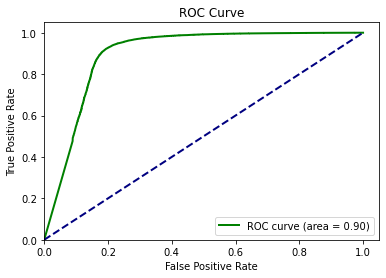

In [143]:
roc_curve_plot(y_test, y_pred_cv_nb_prob[:,1])

#### **3.2 Naive Bayes on Tfidf Vectorizer**

In [144]:
%time nb.fit(X_train_tfidf,y_train)
y_pred_tfidf_nb= nb.predict(X_test_tfidf)

CPU times: user 277 ms, sys: 121 ms, total: 398 ms
Wall time: 403 ms


In [145]:
print(classification_report(y_test,y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       0.95      0.26      0.40     13559
           1       0.80      1.00      0.89     40436

    accuracy                           0.81     53995
   macro avg       0.87      0.63      0.64     53995
weighted avg       0.84      0.81      0.77     53995



In [152]:
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_tfidf_nb) * 100:.1f}%")
print(f"Test Precision: {metrics.precision_score(y_test, y_pred_tfidf_nb) * 100:.1f}%")
print(f"Test Recall: {metrics.recall_score(y_test, y_pred_tfidf_nb) * 100:.1f}%")

Test Accuracy: 80.9%
Test Precision: 79.9%
Test Recall: 99.5%


In [153]:
print(metrics.confusion_matrix(y_test, y_pred_tfidf_nb))

[[ 3467 10092]
 [  195 40241]]


In [148]:
y_pred_tfidf_nb_prob= nb.predict_proba(X_test_cv)
roc_auc_score(y_test, y_pred_tfidf_nb_prob[:,1])

0.6153298587763756

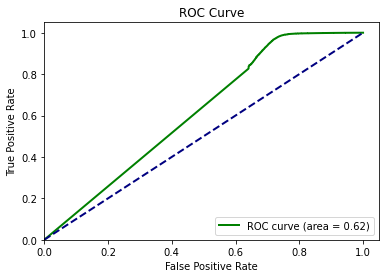

In [149]:
roc_curve_plot(y_test, y_pred_tfidf_nb_prob[:,1])

### **Selection of a particular Text-Preprocessing Technique:** 

#### **I ran the models with both the preprocessing techniques just to take them as a reference. But I have chosen to go forward with TFIDF Vectorizer because:**
#### **1.It is generally faster when fed to the model.**
#### **2. It captures the context of the text and also the occurance of a particular word in the text (Both high and low).**

### **Selection of Binary Classifiers:**

**Summary of Model Performance:**

**1. Logistic Regression:**

    Test Accuracy: 93.7%
    
    Test Precision: 94.8%
    
    Test Recall: 96.9%
    
    Minority Class Precision : 90%
    
    Minority Class Recall : 84%
    
    AUC_ROC_Score : 0.9052
    
    Time Taken to execute : 71 s

**2. Support Vector Machine:**

    Test Accuracy: 94.8%
    
    Test Precision: 96.1%
    
    Test Recall: 97%
    
    Minority Class Precision : 91%
    
    Minority Class Recall : 88%
    
    AUC_ROC_Score : 0.9268
    
    Time Taken to execute : 5.54 s

**3. Naive Bayes:**

    Test Accuracy: 80.9%
    
    Test Precision: 79.9%
    
    Test Recall: 99.5%
    
    Minority Class Precision : 95%
    
    Minority Class Recall : 26%
    
    AUC_ROC_Score : 0.6153
    
    Time Taken to execute : 403 ms

### **We can see from the above comparision that Support Vector Machine Performs the best among the 3 classififers. It performs better in general, performs better for the minority class (Both precision and recall) and also has a good AUC_ROC_score which is a key indictor to check how well the minority class has performed. SVM also takes very little time to execute when compared to logistic regression. Naive Bayes takes the least time but the performance is low.**